In [143]:
## Mini Projet Data mining -Le turnover du personnel-

In [144]:

### Importing the data
import pandas as pd
import matplotlib.pyplot as plt # plotting
df = pd.read_csv('employee_retention_data.csv')
df[:11]

,employee_id,company_id,dept,seniority,SALARY,join_date,quit_date,churn,duration_jours
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,yes,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,yes,340.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN,No,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,yes,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,yes,1040.0
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,yes,578.0
6,88600.0,4,customer_service,21,107000.0,2013-10-21,NaN,No,NaN
7,716309.0,2,customer_service,4,30000.0,2014-03-05,NaN,No,NaN
8,172999.0,9,engineer,7,160000.0,2012-12-10,2015-10-23,yes,1047.0
9,504159.0,1,sales,7,104000.0,2012-06-12,NaN,No,NaN


In [145]:
## les titres de colonnes en des noms minuscules 

In [146]:
df.columns=df.columns.str.lower()

In [147]:

df[:10]



,employee_id,company_id,dept,seniority,salary,join_date,quit_date,churn,duration_jours
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,yes,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,yes,340.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN,No,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,yes,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,yes,1040.0
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,yes,578.0
6,88600.0,4,customer_service,21,107000.0,2013-10-21,NaN,No,NaN
7,716309.0,2,customer_service,4,30000.0,2014-03-05,NaN,No,NaN
8,172999.0,9,engineer,7,160000.0,2012-12-10,2015-10-23,yes,1047.0
9,504159.0,1,sales,7,104000.0,2012-06-12,NaN,No,NaN


In [148]:
df.dtypes

employee_id       float64
company_id          int64
dept               object
seniority           int64
salary            float64
join_date          object
quit_date          object
churn              object
duration_jours    float64
dtype: object

In [149]:
df[['join_date','quit_date']]=df[['join_date','quit_date']].astype("datetime64")

In [150]:
df.dtypes

employee_id              float64
company_id                 int64
dept                      object
seniority                  int64
salary                   float64
join_date         datetime64[ns]
quit_date         datetime64[ns]
churn                     object
duration_jours           float64
dtype: object

In [151]:
import numpy as np

In [152]:
missing=df['salary'].isnull()

In [153]:
df.dropna(subset=['salary'],axis=0, inplace=True)

In [154]:
df['salary'].dtypes


dtype('float64')

In [155]:
print("shape:",df.shape)

shape: (24702, 9)


In [156]:
df.describe()

,employee_id,company_id,seniority,salary,duration_jours
count,24702.000000,24702.000000,24702.000000,24702.000000,13510.000000
mean,501604.403530,3.426969,14.127803,138183.345478,613.486825
std,288909.026101,2.700011,8.089520,76058.184573,328.622613
min,36.000000,1.000000,1.000000,17000.000000,102.000000
25%,250133.750000,1.000000,7.000000,79000.000000,361.000000
50%,500793.000000,2.000000,14.000000,123000.000000,417.000000
75%,753137.250000,5.000000,21.000000,187000.000000,781.000000
max,999969.000000,12.000000,99.000000,408000.000000,1726.000000


In [157]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,churn,duration_jours
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,yes,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,yes,340.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,No,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,yes,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,yes,1040.0


In [158]:
df

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,churn,duration_jours
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,yes,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,yes,340.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,No,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,yes,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,yes,1040.0
...,...,...,...,...,...,...,...,...,...
24697,549847.0,3,customer_service,16,97000.0,2015-02-18,NaT,No,NaN
24698,590087.0,4,engineer,10,160000.0,2015-10-26,NaT,No,NaN
24699,777612.0,4,customer_service,11,67000.0,2013-09-03,2015-10-23,yes,780.0
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09,yes,1123.0


In [159]:
result=df.groupby(['company_id','join_date']).count()

In [160]:
result


employee_id  dept  seniority  salary  quit_date  churn  \
company_id join_date                                                            
1          2011-01-24           25    25         25      25         25     25   
           2011-01-25            2     2          2       2          2      2   
           2011-01-26            2     2          2       2          2      2   
           2011-01-31           30    30         30      30         28     30   
           2011-02-01            7     7          7       7          7      7   
...                            ...   ...        ...     ...        ...    ...   
12         2014-05-19            2     2          2       2          1      2   
           2014-10-13            1     1          1       1          0      1   
           2015-03-23            1     1          1       1          0      1   
           2015-07-06            1     1          1       1          0      1   
           2015-07-27            1     1          1       1          0      1   

                       duration_jours  
company_id join_date                   
1          2011-01-24              25  
           2011-01-25               2  
           2011-01-26               2  
           2011-01-31              28  
           2011-02-01               7  
...                               ...  
12         2014-05-19               1  
           2014-10-13               0  
           2015-03-23               0  
           2015-07-06               0  
           2015-07-27               0  

[5130 rows x 7 columns]

In [161]:
count_df=pd.DataFrame(columns = ['company_id', 'join_date','count_employee']) 

In [162]:
result_final=result[['employee_id']]

In [163]:
result_final.rename(columns={"employee_id": "count_employee"})

count_employee
company_id join_date                 
1          2011-01-24              25
           2011-01-25               2
           2011-01-26               2
           2011-01-31              30
           2011-02-01               7
...                               ...
12         2014-05-19               2
           2014-10-13               1
           2015-03-23               1
           2015-07-06               1
           2015-07-27               1

[5130 rows x 1 columns]

In [175]:
new_emp=df[["employee_id","company_id","join_date","seniority"]]

In [176]:
new_emp

,employee_id,company_id,join_date,seniority
0,13021.0,7,2014-03-24,28
1,825355.0,7,2013-04-29,20
2,927315.0,4,2014-10-13,14
3,662910.0,7,2012-05-14,20
4,256971.0,2,2011-10-17,23
...,...,...,...,...
24697,549847.0,3,2015-02-18,16
24698,590087.0,4,2015-10-26,10
24699,777612.0,4,2013-09-03,11
24700,97289.0,10,2011-12-13,98


In [179]:
new_emp_final=new_emp[new_emp["seniority"]==1].groupby(['company_id','join_date']).count()

In [180]:
new_emp_final

employee_id  seniority
company_id join_date                         
1          2011-01-24            2          2
           2011-01-31            2          2
           2011-02-22            1          1
           2011-03-07            1          1
           2011-03-15            1          1
...                            ...        ...
10         2015-07-13            1          1
           2015-07-21            1          1
           2015-08-10            1          1
11         2013-01-15            1          1
12         2015-03-23            1          1

[693 rows x 2 columns]

In [181]:
quit_emp=df[["employee_id","company_id","quit_date","churn"]]

In [182]:
quit_emp

,employee_id,company_id,quit_date,churn
0,13021.0,7,2015-10-30,yes
1,825355.0,7,2014-04-04,yes
2,927315.0,4,NaT,No
3,662910.0,7,2013-06-07,yes
4,256971.0,2,2014-08-22,yes
...,...,...,...,...
24697,549847.0,3,NaT,No
24698,590087.0,4,NaT,No
24699,777612.0,4,2015-10-23,yes
24700,97289.0,10,2015-01-09,yes


In [183]:
quit_emp_final=quit_emp[quit_emp["churn"]=="yes"].groupby(['company_id','quit_date']).count()

In [185]:
quit_emp_final.head(20)

employee_id  churn
company_id quit_date                     
1          2011-10-21            1      1
           2011-11-11            1      1
           2011-11-22            1      1
           2011-11-25            1      1
           2011-12-09            1      1
           2011-12-16            1      1
           2011-12-23            2      2
           2011-12-30            4      4
           2012-01-03            1      1
           2012-01-05            1      1
           2012-01-06            5      5
           2012-01-09            1      1
           2012-01-13            5      5
           2012-01-17            1      1
           2012-01-19            2      2
           2012-01-20            7      7
           2012-01-27            6      6
           2012-01-30            1      1
           2012-02-03            6      6
           2012-02-10            7      7

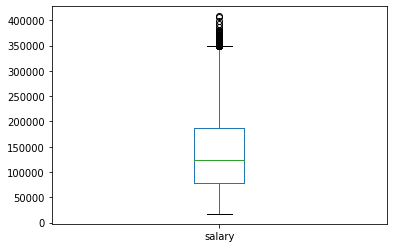

In [186]:
df.plot.box(x="churn", y="salary")

In [195]:
from sklearn import model_selection ## randomly split daa into training and test sets
# set seed for reproducibility of random process
seed = 7 
#training, test datset 
a = df.values 
X = a[:, 3:5] 
Y = a[:, 7] 
validation_size = 0.20 # 80% training data, 20% test data
# randomly split data into training and test sets
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size= validation_size, random_state=seed) 


In [197]:
from sklearn.tree import DecisionTreeClassifier
# Create decision tree classifer object
clf=DecisionTreeClassifier()
# Train model
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [198]:
model=clf.fit(X_validation, Y_validation)

In [199]:
y_pred=model.predict(X_validation)

In [200]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#Evaluating predictions
#Building confusion matrix:
cm = confusion_matrix(Y_validation, y_pred)
cm


array([[2017,  190],
       [ 618, 2116]])

In [201]:
#model accuracy
accuracy_score(Y_validation, y_pred)

0.8364703501315524

In [203]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, Y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_validation)

In [204]:
#Evaluating predictions
#Building confusion matrix:
cm = confusion_matrix(Y_validation, y_pred)
cm

array([[ 932, 1275],
       [1096, 1638]])

In [205]:
#Calculating model accuracy:

accuracy = accuracy_score(Y_validation, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 52.01 %.


In [217]:
# creating list of K for KNN
k_list = list(range(1480,1500,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [218]:
cv_scores

[0.5618640555726166,
 0.5614591971693332,
 0.5615605398121031,
 0.561408538685842,
 0.5613075033489341,
 0.5613579313724706,
 0.5614592483912972,
 0.5614085386339979,
 0.5615097276367977,
 0.561408564257941]

In [219]:
MSE = [1 - x for x in cv_scores]
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 1480.


In [220]:

# model 1: KNN
knn = KNeighborsClassifier(n_neighbors=1480)
knn.fit(X_train, Y_train) # fit on training data
pred_knn = knn.predict(X_validation) # make predictions based off of fitted model
print("Accuracy Score:", accuracy_score(Y_validation, pred_knn), "\n") # accuracy (correct/ total)
print("Confustion Matrix: \n", confusion_matrix(Y_validation, pred_knn), "\n\n") # confusion matrix checks for True Positives, False Negatives, False Positives, and True Negatives errors/ correct predictions
# checks actual (rows) by predicted (columns) for Iris-Setosa (IS), Iris-veriscolor (IVer), and Iris-Virginica (IV)
# all 7 IS were corrected predicted, 11 IVer were correctly predicted, 1 was wrongly classified as (IV), 9 IV were correctly predicted with 2 wrongly classified as IVer
print("Classification Report: \n", classification_report(Y_validation, pred_knn)) # report

Accuracy Score: 0.5691155636510827 

Confustion Matrix: 
 [[ 492 1715]
 [ 414 2320]] 


Classification Report: 
               precision    recall  f1-score   support

          No       0.54      0.22      0.32      2207
         yes       0.57      0.85      0.69      2734

    accuracy                           0.57      4941
   macro avg       0.56      0.54      0.50      4941
weighted avg       0.56      0.57      0.52      4941



In [222]:
models=[]
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=1480)))

results=[]; names=[]

for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed) # 10 folds, put in seed for reproducibility
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold)#, scoring=scoring) # cross validation with 10 "folds" or iterations
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # prints the mean and standard devation of each set of cross validations for each algorithm. The %.. are place holders in strings
        print(msg)


CART: 0.509641 (0.010024)
KNN: 0.561510 (0.010556)
